In [36]:
import pandas as pd
from matplotlib.pyplot import plot
mean_alpha = 1.35

In [37]:
options = pd.read_csv("banknifty-options.csv")
prices = pd.read_csv("banknifty-prices.csv")

In [38]:
options["Alpha"] = (prices["Close"] - options["Strike Price"]) / options["Close"]
prices["Change"] = ((prices["Close"] - prices["Open"]) / prices["Close"])*100
# options["Alpha-Prev"] = options.Alpha.shift(1)
options["Alpha-Change"] = ((options["Alpha"] - options.Alpha.shift(1)) / options["Alpha"])*100
options["Alpha-Mean"] = (options.Alpha.shift(1)+options.Alpha.shift(2)+options.Alpha.shift(3)) / 3
options["Change"] = ((options["Open"] - options["Close"]) / options["Open"])*100

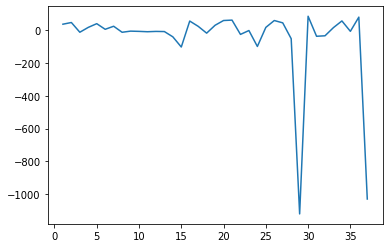

In [39]:
plot(options["Alpha-Change"])
# plot(options["Change"])

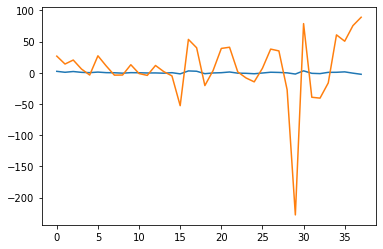

In [40]:
plot(prices["Change"])
plot(options["Change"])

In [41]:
# prices

In [42]:
options[10:]

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,...,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value,Alpha,Alpha-Change,Alpha-Mean,Change
10,BANKNIFTY,17-Jan-2022,24-Feb-2022,PE,35000,235.95,252.75,205.15,238.95,240.00,...,1008,8880.02,60.02,68075,11475,-,13.459510,-7.058699,15.585002,-1.271456
11,BANKNIFTY,18-Jan-2022,24-Feb-2022,PE,35000,250.00,276.15,181.00,260.50,261.70,...,2099,18482.94,116.69,76650,8575,-,12.323608,-9.217283,14.362722,-4.200000
12,BANKNIFTY,19-Jan-2022,24-Feb-2022,PE,35000,299.85,336.25,230.15,264.85,262.45,...,2225,19628.78,160.03,85575,8925,38041.35,11.483292,-7.317727,13.397565,11.672503
13,BANKNIFTY,20-Jan-2022,24-Feb-2022,PE,35000,273.75,326.00,247.50,268.60,256.00,...,2124,18734.55,149.55,97900,12325,37850.85,10.613738,-8.192727,12.422137,1.881279
14,BANKNIFTY,21-Jan-2022,24-Feb-2022,PE,35000,324.05,430.00,304.25,340.25,310.00,...,4127,36488.62,377.37,114625,16725,-,7.565907,-40.283740,11.473546,-4.999229
15,BANKNIFTY,24-Jan-2022,24-Feb-2022,PE,35000,341.30,758.00,323.05,521.20,554.55,...,8891,78964.88,1168.63,127200,12575,-,3.736665,-102.477520,9.887646,-52.710226
16,BANKNIFTY,25-Jan-2022,24-Feb-2022,PE,35000,686.65,719.75,280.10,319.80,298.70,...,29459,260674.17,2907.92,219000,91800,37706.75,8.463884,55.851645,7.305437,53.426054
17,BANKNIFTY,27-Jan-2022,24-Feb-2022,PE,35000,448.00,469.30,252.70,268.70,257.30,...,16796,148431.92,1466.92,221425,2425,-,11.098251,23.736778,6.588819,40.022321
18,BANKNIFTY,28-Jan-2022,24-Feb-2022,PE,35000,237.00,322.90,195.00,285.65,282.75,...,23143,203929.18,1427.93,279475,58050,-,9.415018,-17.878164,7.766267,-20.527426
19,BANKNIFTY,31-Jan-2022,24-Feb-2022,PE,35000,228.50,294.30,200.15,220.40,225.55,...,18457,162584.22,1085.47,270275,-9200,-,13.499773,30.257951,9.659051,3.544858


In [43]:
threshold = 0.3
max_profit = 0
optimal_thresh = 0
while(threshold <= 2):
    net_result = 0
    threshold += 0.01
    for index,rows in options.iterrows():
        if index < 0:
            continue
        if (rows["Alpha"] / rows["Alpha-Mean"]) > threshold:
#             print("Buy!")
            try:
                result = options["Change"][index+1]
                net_result += result
            except:
                pass
    if net_result >= max_profit:
        max_profit = net_result
        optimal_thresh = threshold

print("Net profit : " + str(max_profit))
print("Optimal Threshold: " + str(optimal_thresh))

Net profit : 345.7923825443593
Optimal Threshold: 1.1500000000000006


In [44]:
net_result = 0
for index,rows in options.iterrows():
        if index < 0:
            continue
        if (rows["Alpha"] / rows["Alpha-Mean"]) > mean_alpha:
#             print("Buy!")
            try:
                result = options["Change"][index+1]
                net_result += result
            except:
                pass
print(str(net_result))   

275.051870014402
